In [3]:
from __future__ import print_function, division

import numpy as np

import thinkbayes2
from thinkbayes2 import Pmf, Cdf, Suite, Beta, Joint
import thinkplot

from scipy.special import binom
import scipy.stats as stats
from itertools import product

% matplotlib inline

In [4]:
from thinkbayes2 import EvalWeibullPdf, EvalWeibullCdf, MakeWeibullPmf

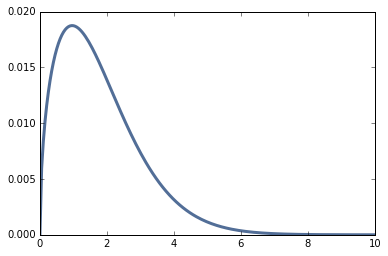

In [5]:
# Distribution of lifespan in years
pmf = MakeWeibullPmf(lam=2, k=1.5, high=10)
thinkplot.Pdf(pmf)

In [6]:
# p(still working) = p(lifespan > 1) = 1 - CDFlifespan(1)
# Subtracted because CDFlifespan(1) adds up the probabilities that it is alive at points less than a year
1-EvalWeibullCdf(1, 2, 1.5)

0.70218850132655963

In [7]:
class LightBulb(Suite, Joint):
    '''data: float, elapsed time between installation and discovering that a bulb is dead.
    hypo: (lam, k) hypothetical parameters of Weibull distribution'''
    def Likelihood(self, data, hypo):
        x = data
        lam, k = hypo
        return EvalWeibullCdf(x, lam, k)


In [8]:
ks = np.linspace(0, 10, 100)
lams = np.linspace(0, 10, 100)
weibulls = LightBulb(product(lams, ks))
weibulls.Update(1)

0.1643551102303169

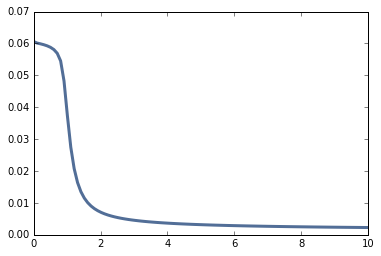

In [9]:
thinkplot.Pdf(weibulls.Marginal(0))

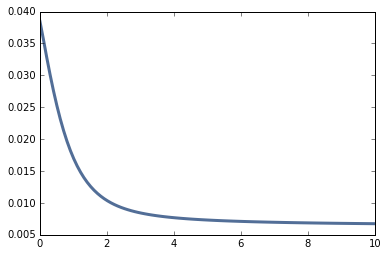

In [10]:
thinkplot.Pdf(weibulls.Marginal(1))